In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [11]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from ipywidgets import interact,interact_manual
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
import warnings
warnings.filterwarnings("ignore")

In [5]:
x=pickle.load(open("/content/drive/MyDrive/datasets/newdata1/RE_X.pkl","rb"))
y=pickle.load(open("/content/drive/MyDrive/datasets/newdata1/RE_Y.pkl","rb"))

In [8]:
x.shape

(161726, 21)

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# **Artificial Neural network & FNN**

In [58]:
ann=keras.models.Sequential([
                             keras.layers.Input(shape=x.shape[1]),
                             keras.layers.Dense(300,activation="relu"),
                             keras.layers.Dense(150,activation="relu"),
                             keras.layers.Dense(75,activation="relu"),
                             keras.layers.Dense(10,activation="relu"),
                             keras.layers.Dense(2,activation="sigmoid")
])
ann.compile(optimizer="Adam",loss="sparse_categorical_crossentropy",metrics="accuracy")
ANN_MODEL=ann.fit(x_train,y_train,epochs=10)

Epoch 1/10
4044/4044 [==============================] - 11s 3ms/step - loss: 0.4425 - accuracy: 0.8129
Epoch 2/10
4044/4044 [==============================] - 11s 3ms/step - loss: 0.3426 - accuracy: 0.8456
Epoch 3/10
4044/4044 [==============================] - 11s 3ms/step - loss: 0.3301 - accuracy: 0.8532
Epoch 4/10
4044/4044 [==============================] - 11s 3ms/step - loss: 0.3230 - accuracy: 0.8565
Epoch 5/10
4044/4044 [==============================] - 11s 3ms/step - loss: 0.3163 - accuracy: 0.8612
Epoch 6/10
4044/4044 [==============================] - 11s 3ms/step - loss: 0.3127 - accuracy: 0.8630
Epoch 7/10
4044/4044 [==============================] - 11s 3ms/step - loss: 0.3100 - accuracy: 0.8632
Epoch 8/10
4044/4044 [==============================] - 11s 3ms/step - loss: 0.3080 - accuracy: 0.8649
Epoch 9/10
4044/4044 [==============================] - 11s 3ms/step - loss: 0.3062 - accuracy: 0.8659
Epoch 10/10
4044/4044 [==============================] - 10s 3ms/step - l

In [59]:
 ann.save("/content/drive/MyDrive/datasets/newdata1/ANN_MODEL.h5")

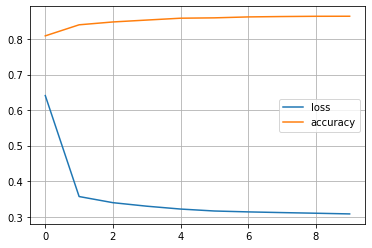

In [21]:
pd.DataFrame(ANN_MODEL.history).plot()
plt.grid()
plt.show()

# Funtional API

In [26]:
input_=keras.layers.Input(shape=x.shape[1])
hidden1=keras.layers.Dense(300,activation="relu")(input_)
hidden2=keras.layers.Dense(150,activation="relu")(hidden1)
hidden3=keras.layers.Dense(75,activation="relu")(hidden2)
hidden4=keras.layers.Dense(10,activation="relu")(hidden3)
concat=keras.layers.concatenate([hidden4,input_])
output=keras.layers.Dense(2,activation="sigmoid")(concat)
FUN_API=keras.models.Model(inputs=[input_],outputs=[output])
FUN_API.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics="accuracy")
FUN_API_hist=FUN_API.fit(x_train,y_train,epochs=10)

Epoch 1/10
4044/4044 [==============================] - 12s 3ms/step - loss: 1.5247 - accuracy: 0.7867
Epoch 2/10
4044/4044 [==============================] - 11s 3ms/step - loss: 0.7432 - accuracy: 0.8061
Epoch 3/10
4044/4044 [==============================] - 12s 3ms/step - loss: 0.6049 - accuracy: 0.8113
Epoch 4/10
4044/4044 [==============================] - 11s 3ms/step - loss: 0.4932 - accuracy: 0.8204
Epoch 5/10
4044/4044 [==============================] - 12s 3ms/step - loss: 0.4216 - accuracy: 0.8325
Epoch 6/10
4044/4044 [==============================] - 12s 3ms/step - loss: 0.3879 - accuracy: 0.8395
Epoch 7/10
4044/4044 [==============================] - 11s 3ms/step - loss: 0.3641 - accuracy: 0.8441
Epoch 8/10
4044/4044 [==============================] - 12s 3ms/step - loss: 0.3570 - accuracy: 0.8460
Epoch 9/10
4044/4044 [==============================] - 11s 3ms/step - loss: 0.3480 - accuracy: 0.8485
Epoch 10/10
4044/4044 [==============================] - 11s 3ms/step - l

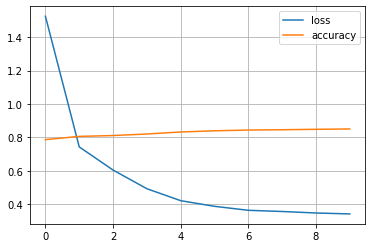

In [27]:
pd.DataFrame(FUN_API_hist.history).plot()
plt.grid()
plt.show()

# Densed Functional API

In [29]:
input_=keras.layers.Input(shape=x.shape[1])
hidden1=keras.layers.Dense(300,activation="relu")(input_)
concat_1=keras.layers.concatenate([input_,hidden1])
hidden2=keras.layers.Dense(150,activation="relu")(concat_1)
concat_2=keras.layers.concatenate([input_,hidden2])
hidden3=keras.layers.Dense(75,activation="relu")(concat_2)
concat_3=keras.layers.concatenate([input_,hidden3])
hidden4=keras.layers.Dense(10,activation="relu")(concat_3)
concat_4=keras.layers.concatenate([input_,hidden4])
output=keras.layers.Dense(2,activation="sigmoid")(concat_4)
FUN_API=keras.models.Model(inputs=[input_],outputs=[output])
FUN_API.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics="accuracy")
Densed_FUN_API_hist=FUN_API.fit(x_train,y_train,epochs=10)

Epoch 1/10
4044/4044 [==============================] - 13s 3ms/step - loss: 2.4857 - accuracy: 0.7871
Epoch 2/10
4044/4044 [==============================] - 12s 3ms/step - loss: 0.9367 - accuracy: 0.8030
Epoch 3/10
4044/4044 [==============================] - 12s 3ms/step - loss: 0.7651 - accuracy: 0.8081
Epoch 4/10
4044/4044 [==============================] - 12s 3ms/step - loss: 0.7002 - accuracy: 0.8129
Epoch 5/10
4044/4044 [==============================] - 12s 3ms/step - loss: 0.5650 - accuracy: 0.8193
Epoch 6/10
4044/4044 [==============================] - 12s 3ms/step - loss: 0.5398 - accuracy: 0.8208
Epoch 7/10
4044/4044 [==============================] - 12s 3ms/step - loss: 0.4987 - accuracy: 0.8238
Epoch 8/10
4044/4044 [==============================] - 13s 3ms/step - loss: 0.4830 - accuracy: 0.8262
Epoch 9/10
4044/4044 [==============================] - 12s 3ms/step - loss: 0.4486 - accuracy: 0.8316
Epoch 10/10
4044/4044 [==============================] - 12s 3ms/step - l

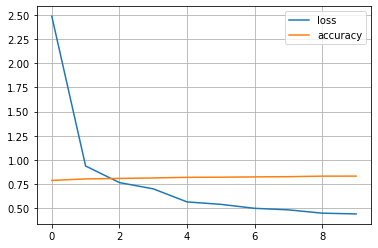

In [31]:
pd.DataFrame(Densed_FUN_API_hist.history).plot()
plt.grid()
plt.show()

# Densed Functional API with different layers

In [34]:
input_=keras.layers.Input(shape=x.shape[1])
hidden1=keras.layers.Dense(300,activation="relu")(input_)
concat_1=keras.layers.concatenate([input_,hidden1])
hidden2=keras.layers.Dense(150,activation="relu")(concat_1)
concat_2=keras.layers.concatenate([hidden1,hidden2])
hidden3=keras.layers.Dense(75,activation="relu")(concat_2)
concat_3=keras.layers.concatenate([hidden2,hidden3])
hidden4=keras.layers.Dense(10,activation="relu")(concat_3)
concat_4=keras.layers.concatenate([hidden3,hidden4])
output=keras.layers.Dense(2,activation="sigmoid")(concat_4)
FUN_API=keras.models.Model(inputs=[input_],outputs=[output])
FUN_API.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics="accuracy")
Comples_Densed_FUN_API_hist=FUN_API.fit(x_train,y_train,epochs=10)

Epoch 1/10
4044/4044 [==============================] - 14s 3ms/step - loss: 1.9774 - accuracy: 0.7908
Epoch 2/10
4044/4044 [==============================] - 14s 3ms/step - loss: 0.9786 - accuracy: 0.8057
Epoch 3/10
4044/4044 [==============================] - 14s 3ms/step - loss: 0.8805 - accuracy: 0.8052
Epoch 4/10
4044/4044 [==============================] - 14s 3ms/step - loss: 0.8103 - accuracy: 0.8054
Epoch 5/10
4044/4044 [==============================] - 14s 3ms/step - loss: 0.6561 - accuracy: 0.8113
Epoch 6/10
4044/4044 [==============================] - 14s 3ms/step - loss: 0.5914 - accuracy: 0.8162
Epoch 7/10
4044/4044 [==============================] - 14s 3ms/step - loss: 0.5637 - accuracy: 0.8164
Epoch 8/10
4044/4044 [==============================] - 14s 3ms/step - loss: 0.5135 - accuracy: 0.8227
Epoch 9/10
4044/4044 [==============================] - 14s 3ms/step - loss: 0.4813 - accuracy: 0.8245
Epoch 10/10
4044/4044 [==============================] - 14s 3ms/step - l

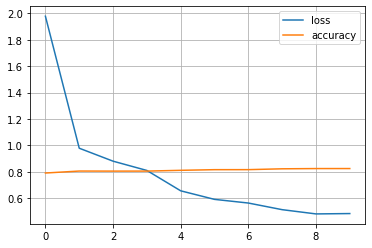

In [35]:
pd.DataFrame(Comples_Densed_FUN_API_hist.history).plot()
plt.grid()
plt.show()

In [37]:
X_TRAIN=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
X_TEST=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [44]:
X_TRAIN.shape[0]

129380

In [54]:
RNN=keras.models.Sequential([
                             keras.layers.SimpleRNN(300,activation="relu",input_shape=(21,1),return_sequences=True),
                             keras.layers.SimpleRNN(150,activation="relu"),
                             keras.layers.Dense(75,activation="relu"),
                             keras.layers.Dense(2,activation="sigmoid")
])
RNN.compile(optimizer="Adam",loss="sparse_categorical_crossentropy",metrics="accuracy")
RNN_MODEL=RNN.fit(X_TRAIN,y_train,epochs=10)

Epoch 1/10
4044/4044 [==============================] - 152s 37ms/step - loss: 0.7951 - accuracy: 0.8188
Epoch 2/10
4044/4044 [==============================] - 151s 37ms/step - loss: 0.3259 - accuracy: 0.8590
Epoch 3/10
4044/4044 [==============================] - 151s 37ms/step - loss: 0.3205 - accuracy: 0.8610
Epoch 4/10
4044/4044 [==============================] - 151s 37ms/step - loss: 0.3063 - accuracy: 0.8671
Epoch 5/10
4044/4044 [==============================] - 151s 37ms/step - loss: 0.2936 - accuracy: 0.8728
Epoch 6/10
4044/4044 [==============================] - 151s 37ms/step - loss: 0.2823 - accuracy: 0.8779
Epoch 7/10
4044/4044 [==============================] - 152s 38ms/step - loss: 0.2763 - accuracy: 0.8802
Epoch 8/10
4044/4044 [==============================] - 154s 38ms/step - loss: 0.2739 - accuracy: 0.8804
Epoch 9/10
4044/4044 [==============================] - 154s 38ms/step - loss: 0.2709 - accuracy: 0.8827
Epoch 10/10
4044/4044 [==============================] 

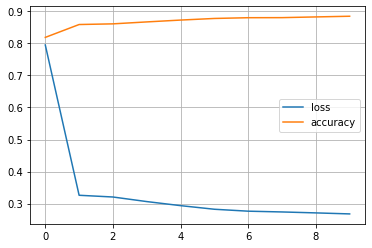

In [55]:
pd.DataFrame(RNN_MODEL.history).plot()
plt.grid()
plt.show()

In [57]:
 RNN.save("/content/drive/MyDrive/datasets/newdata1/RNN_MODEL.h5")